<a href="https://colab.research.google.com/github/Jake0925/Seaborn/blob/master/SeabornAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk') # context - 폰트

titatic = sns.load_dataset('titanic')
diamonds = sns.load_dataset('diamonds')
penguins = sns.load_dataset("penguins")
excercise = sns.load_dataset("exercise")
iris = sns.load_dataset('iris')
tips= sns.load_dataset('tips')
anscombe = sns.load_dataset("anscombe")
dots = sns.load_dataset('dots')
flights = sns.load_dataset('flights')

In [271]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [272]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
115,17.31,3.5,Female,No,Sun,Dinner,2


In [273]:
tips.day.value_counts()  # day항목은 결과종류별로 몇개씩 있는지 확인가능

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [274]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [275]:
tips[tips['day'] == 'Sun'].describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,21.410000,3.255132,2.842105
std,8.832122,1.234880,1.007341
min,7.250000,1.010000,2.000000
25%,14.987500,2.037500,2.000000
50%,19.630000,3.150000,2.000000
75%,25.597500,4.000000,4.000000
max,48.170000,6.500000,6.000000


In [276]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [277]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [278]:
tips[tips['smoker'] == 'Yes'].corr()

,total_bill,tip,size
total_bill,1.000000,0.488218,0.527890
tip,0.488218,1.000000,0.332227
size,0.527890,0.332227,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


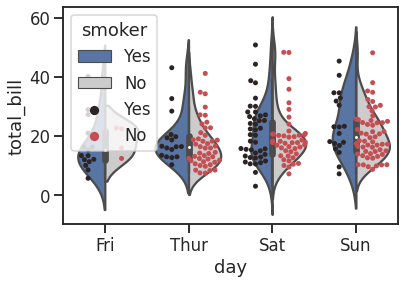

In [279]:
sns.violinplot(data=tips, x = 'day', y = 'total_bill', hue='smoker',
               order=['Fri', 'Thur', 'Sat', 'Sun'],
               split=True, palette={'Yes':'b', 'No':'0.8'})

sns.swarmplot(data=tips, x='day', y = 'total_bill', hue='smoker',
              order=['Fri', 'Thur', 'Sat', 'Sun'],
              split=True, color='r')

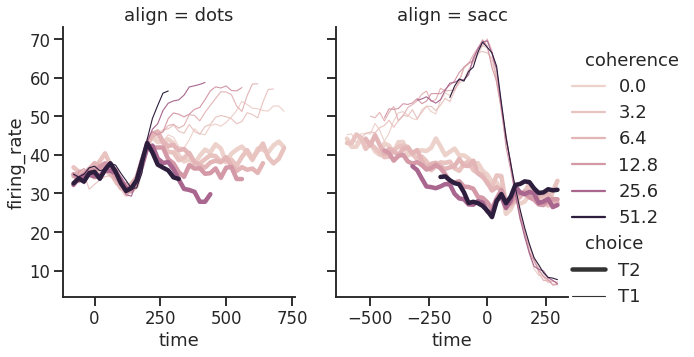

In [280]:
sns.relplot(data=dots, x='time', y = 'firing_rate', hue = 'coherence', kind ='line',
            col='align', 
            size='choice', size_order=["T2", "T1"],
            legend='full',
            height=5, aspect=.8, facet_kws=dict(sharex=False)) # facet_kws=dict(sharex=False)- x축 범위를 값의 시작부터 끝의 값까지만 표시

# lmplot

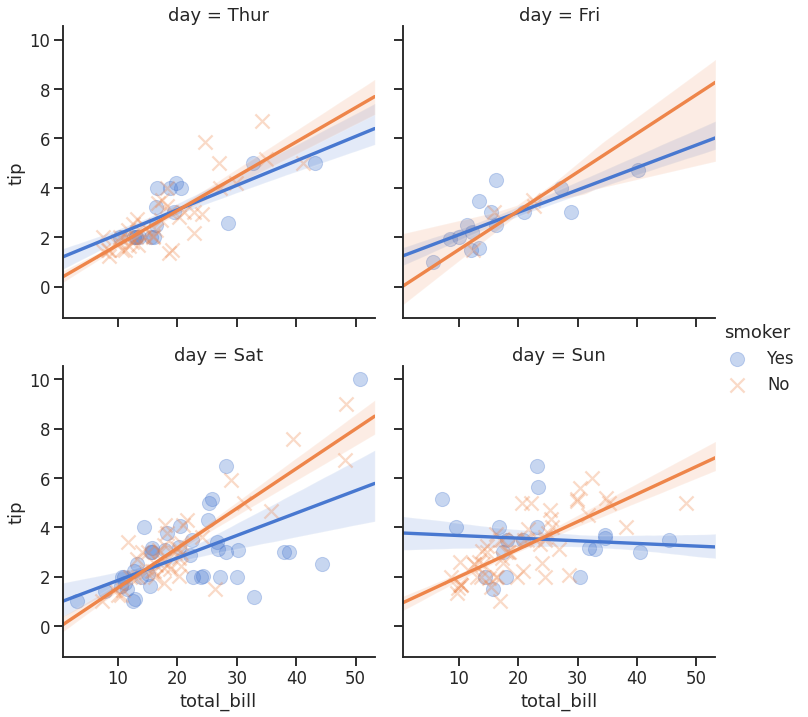

In [281]:
sns.lmplot(data=tips, x='total_bill', y = 'tip', hue='smoker',  # regplot와 다르게 hue속성을 사용할수 있다
           col='day', col_wrap=2, # Day기준으로 그래푸 따로 그리고 수평방향으로 2개씩만 그래프 표시
           height = 5, # 그래프 크기설정
           ci=70, # 신뢰구간범위설정
           palette='muted',
           markers=["o","x"] , # 두개의 그래프롤 겹쳐서 그릴경우 다르게 표시
           scatter_kws={'s': 200, 'alpha': 0.3}, # 점크기와 농도조절,  s;는 포인트사이즈를 의미한다
           truncate= False) # 그래프가 잘려서 보이는부분 제거, y축기준이  True인경우 0부터표시 False인경우 가운데로 이동, * ci속성이 없어야 적용된다

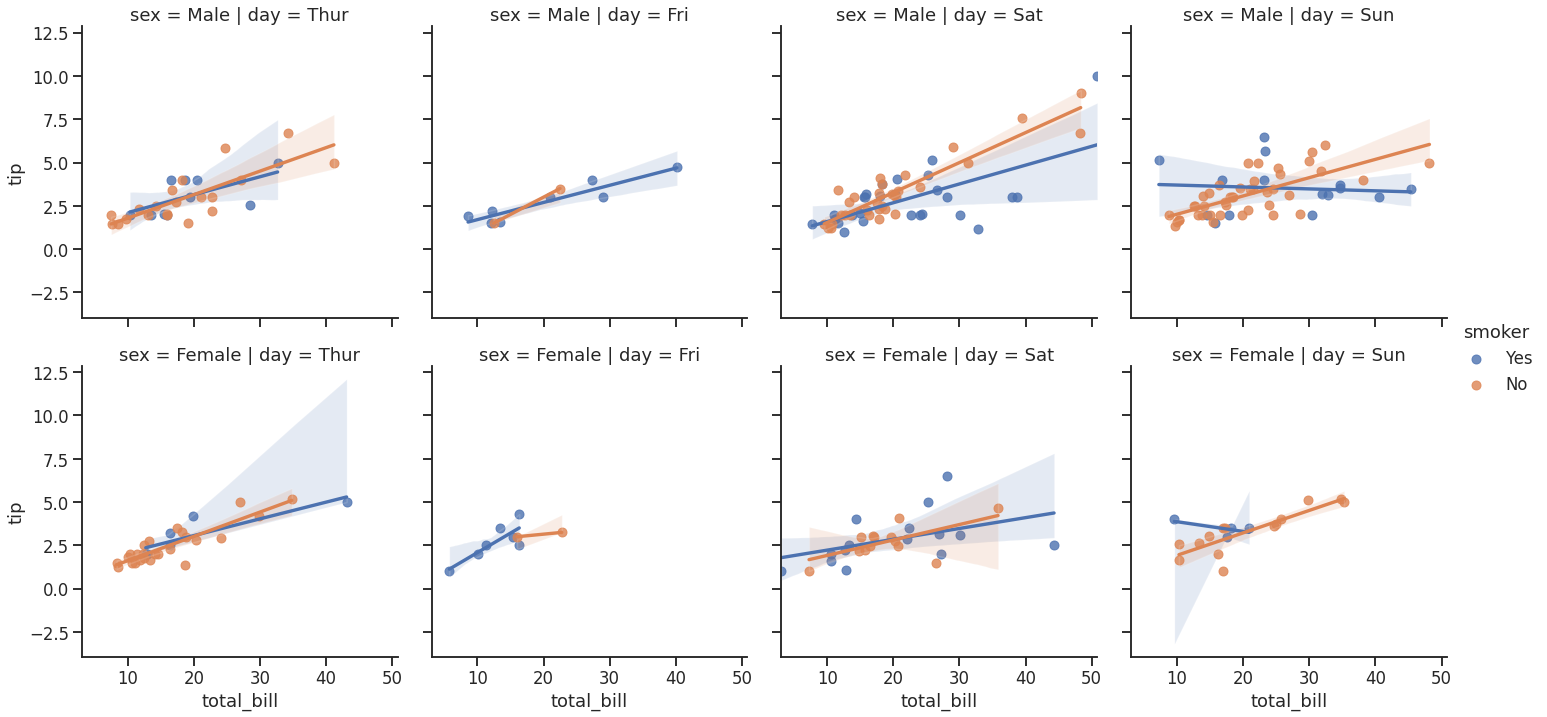

In [282]:
sns.lmplot(data=tips, x='total_bill', y = 'tip', hue='smoker',  # regplot와 다르게 hue속성을 사용할수 있다
           col='day', row = 'sex')  # 그래프에 열 항목도 설정하여 나누어 표시

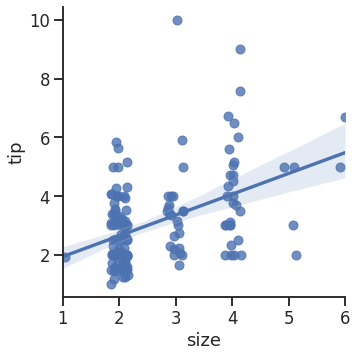

In [283]:
sns.lmplot( data=tips.query("sex == 'Male'"), x="size", y="tip",x_jitter=.15); # x_jitter - 밀집된 빈도를 일정간격 벌려서 볼수있다
                                                                               # query - Male 데이터만 추출해서 볼수있다

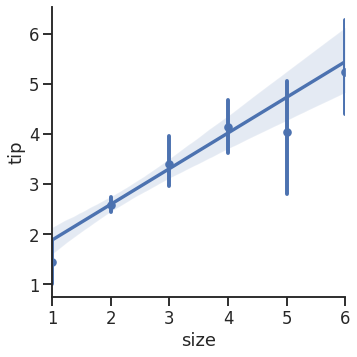

In [284]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean); # x축이 5인경우 막대가 길게 그려졌는데 샘플이 적고 벌어져있어 신뢰구간이 커져서 그렇다
                                                               # x_estimator의 값을 mean으로 함으로서 각 구간별 평균값을 점으로 표시

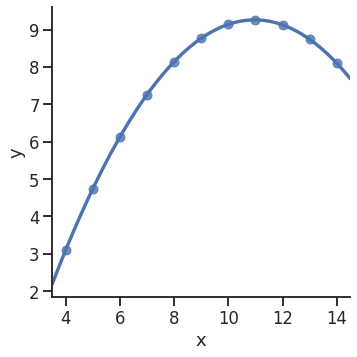

In [285]:
# 비선형으로 그릴경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False,
           order=2);  # 1로 설정할경우 선형 2로설정할 경우 비선형으로 그린다

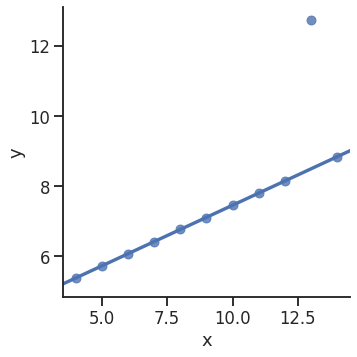

In [286]:
# 이상치를 제거한 경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False,
           robust=True) # 이상치 제거

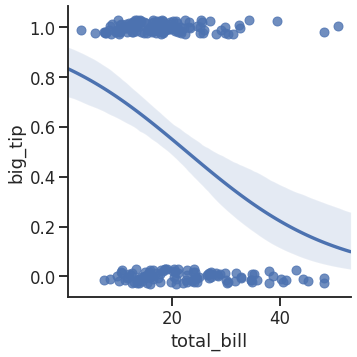

In [287]:
# 로지스틱을 사용한경우
tips["big_tip"] = (tips.tip / tips.total_bill) > .15 # 데이터중 나누어 연산한값이 0.15보다 클경우 True로 아닐경우 False로하여 새로생성한 big_ltips항목안에 넣는다

sns.lmplot(x="total_bill", y="big_tip", data=tips,truncate=False,
           logistic=True, y_jitter=.03);

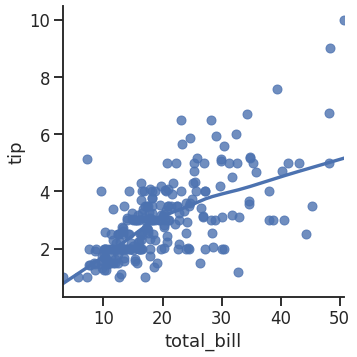

In [288]:
# 다항식 (극소회귀)
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True); # 다항식

# residplot

- 회귀선으로부터 얼마나 떨어져 있는지 시각화해준다

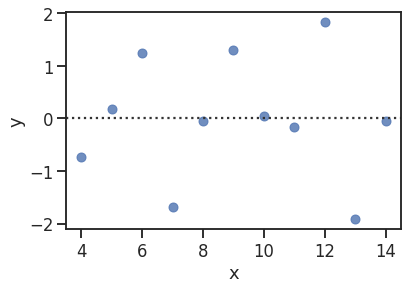

In [289]:
sns.residplot(data=anscombe.query("dataset =='I'"), x = 'x', y='y')

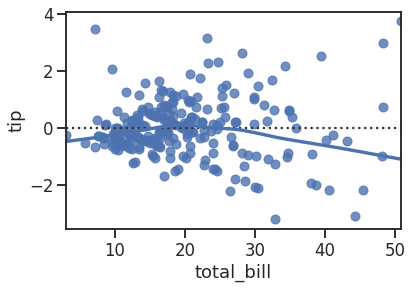

In [290]:
sns.residplot(x="total_bill", y="tip", data=tips, lowess=True) # lowess - 가중치 W를 감안하여 그린다,  오차가 양의방향 또는 음의방향으로 편향되어있는지 알수있다

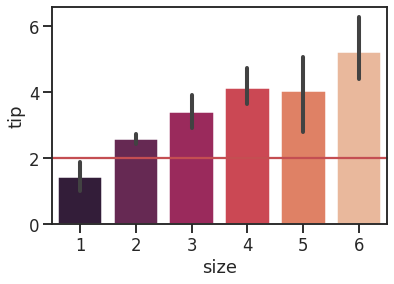

In [291]:
sns.barplot(data = tips, x='size', y ='tip', palette='rocket').axhline(2, color='r', clip_on=False)

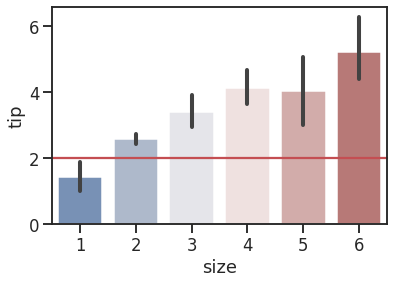

In [292]:
sns.barplot(data = tips, x='size', y ='tip', palette='vlag').axhline(2, color='r', clip_on=False)

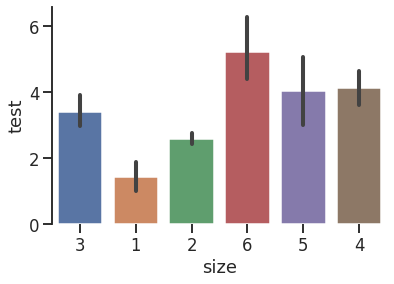

In [293]:
sns.barplot(data = tips, x='size', y ='tip', order=[3,1,2,6,5,4]).set_ylabel('test') # y축 label이름
sns.despine(bottom=True) # 그래프 박스외곽부의 상하라인 제거

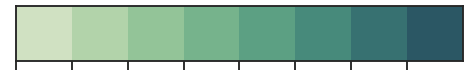

In [294]:
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)
sns.palplot(pal) # pal수치값을 palplot을통해 이미지로 표현

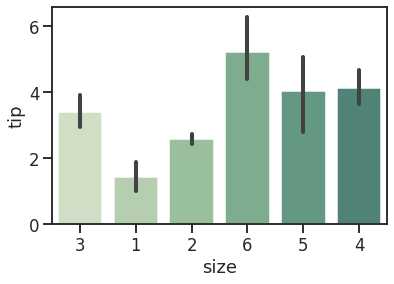

In [295]:
sns.barplot(data = tips, x='size', y ='tip', order=[3,1,2,6,5,4], palette = pal)

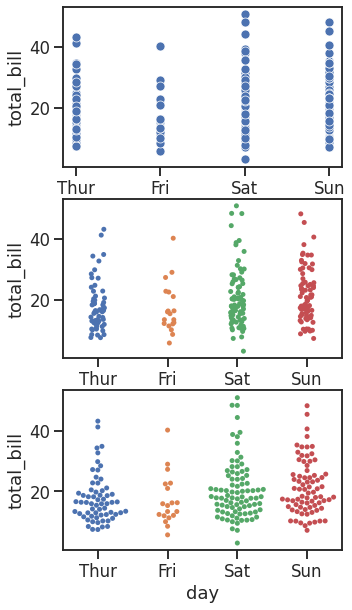

In [296]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.scatterplot(data=tips, x='day', y='total_bill', ax=ax[0])
sns.stripplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.swarmplot(data=tips, x='day', y='total_bill', ax=ax[2])

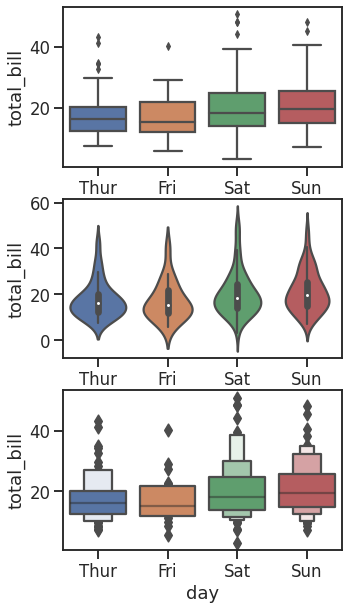

In [297]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,10))
sns.boxplot(data=tips, x = 'day', y = 'total_bill', ax = ax[0]) # Box안의 가운데 수평선은 중앙값을 나타낸다
sns.violinplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.boxenplot(data=tips, x='day', y='total_bill', ax=ax[2])

# Catplot

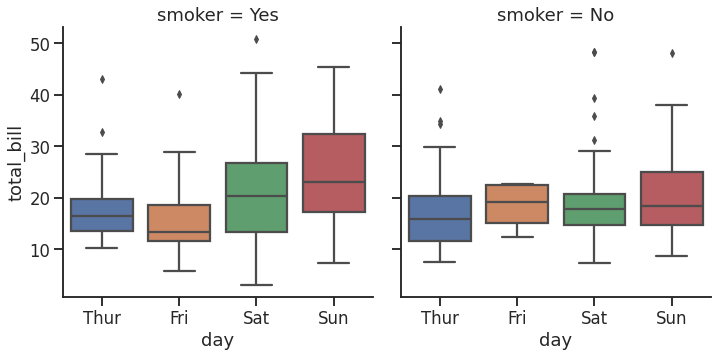

In [298]:
sns.catplot(data=tips, x='day', y='total_bill',
            col = 'smoker',
            kind = 'box')

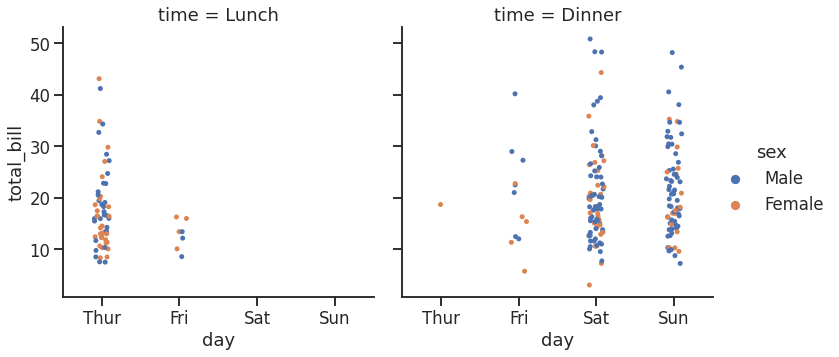

In [299]:
sns.catplot(data=tips, x = 'day', y='total_bill', hue = 'sex',
            col='time')

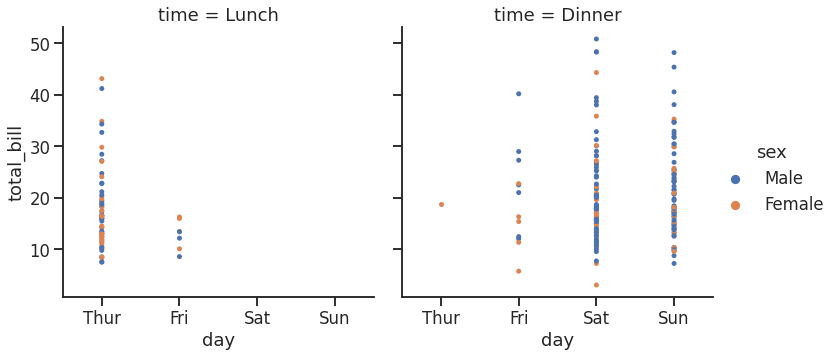

In [300]:
sns.catplot(data=tips, x = 'day', y='total_bill', col='time', hue ='sex',
            jitter=False)

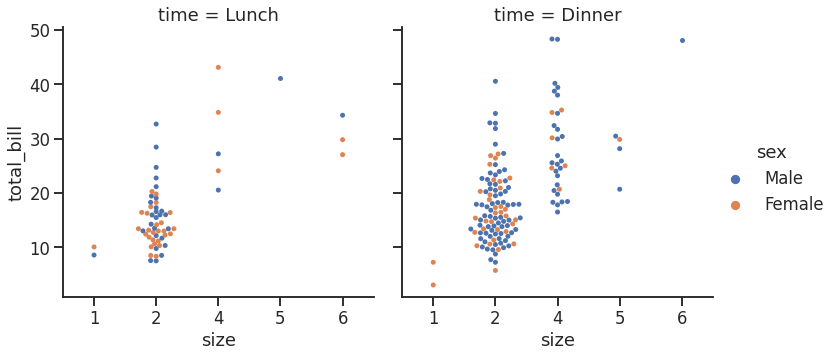

In [301]:
sns.catplot(data=tips.query('size != 3'), x = 'size', y='total_bill', hue= 'sex', # 값이 3인항목제거
            col='time',
            kind= 'swarm',)

In [302]:
dayGroup = tips.groupby(['day'])['total_bill'].describe()
dayGroup

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [303]:
Thur = dayGroup.loc['Thur']
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [304]:
IQR = Thur['75%'] - Thur['25%']
Thur_min = Thur['25%'] - (1.5 * IQR)
Thur_max = Thur['75%'] - (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 0.8737499999999958, 8.586249999999998)

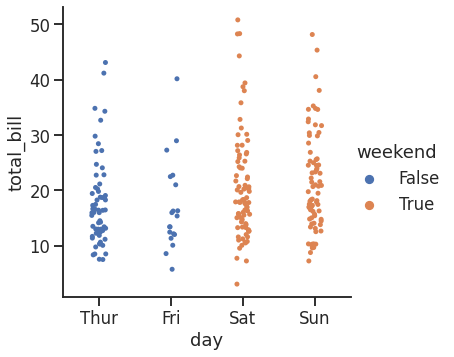

In [305]:
# 주말만 다르게 색칠
tips['weekend'] = tips['day'].isin(['Sat', 'Sun']) # day가 Sat, Sun에 해당하면 True
sns.catplot(data=tips, x='day', y= 'total_bill', hue='weekend')

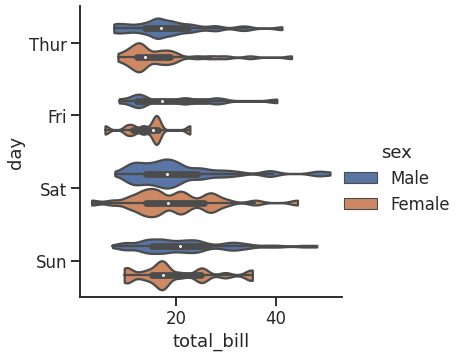

In [306]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex',
            kind='violin',
            cut=0,bw=.15)

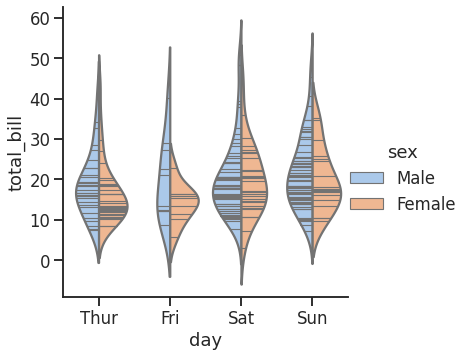

In [307]:
sns.catplot(data=tips, x='day', y = 'total_bill', hue='sex', palette='pastel',
            kind='violin',
            split=True,
            inner='stick') # inner의 설정에 따라 내부의 막대표시변경, ex) point. box, quart(사분위수표시) 

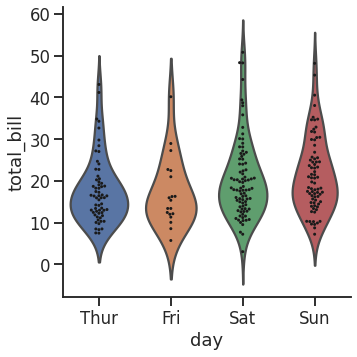

In [308]:

g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips)

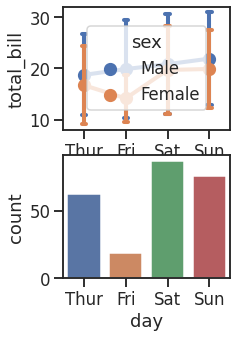

In [309]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(3,5))
sns.pointplot(data=tips, x='day', y ='total_bill',hue = 'sex', ax=ax[0],
              capsize=0.1, # 구간표시되는 수평선의 길이
              ci='sd') # 표준편차
sns.countplot(data=tips, x= 'day', ax=ax[1])

# Line plot

In [310]:
rs= np.random.RandomState(365)
data = rs.randn(365,4).cumsum(axis=0)
pd.DataFrame(data)

,0,1,2,3
0,0.167921,0.523505,0.817376,1.703846
1,-1.979026,1.237704,0.057230,2.743267
2,-2.945478,1.094025,1.628355,2.359988
3,-2.307479,0.749367,1.624072,2.518347
4,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
360,-19.091161,11.538091,-12.324271,15.728471
361,-19.896686,9.886417,-11.185668,16.971170
362,-20.162153,9.466580,-10.388869,17.955768
363,-20.322964,9.636551,-7.977325,19.397242


In [311]:
data_day = pd.date_range('1 1 2021', periods=365, freq='D')
data_day

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [312]:
data=pd.DataFrame(data, data_day, columns=["A", 'B', 'C','D'])
data

,A,B,C,D
2021-01-01,0.167921,0.523505,0.817376,1.703846
2021-01-02,-1.979026,1.237704,0.057230,2.743267
2021-01-03,-2.945478,1.094025,1.628355,2.359988
2021-01-04,-2.307479,0.749367,1.624072,2.518347
2021-01-05,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
2021-12-27,-19.091161,11.538091,-12.324271,15.728471
2021-12-28,-19.896686,9.886417,-11.185668,16.971170
2021-12-29,-20.162153,9.466580,-10.388869,17.955768
2021-12-30,-20.322964,9.636551,-7.977325,19.397242


In [313]:
data=data.rolling(7).mean() # 7간격으로 이동평균값을 찍는다
data

,A,B,C,D
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,-18.482826,10.330142,-12.108625,14.878444
2021-12-28,-18.693797,10.391382,-12.020502,15.376387
2021-12-29,-18.752957,10.062616,-11.685921,15.996722
2021-12-30,-18.918042,9.957435,-11.244617,16.669990


In [314]:
sns.set_theme(style='darkgrid')

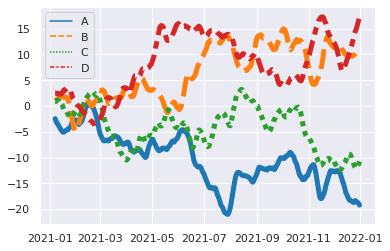

In [315]:
sns.lineplot(data = data, palette='tab10', linewidth = 5)

# Pairplot

In [316]:
tips= sns.load_dataset('tips')
tips.groupby(['day']).mean() # 요일에따른 평균값출력

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


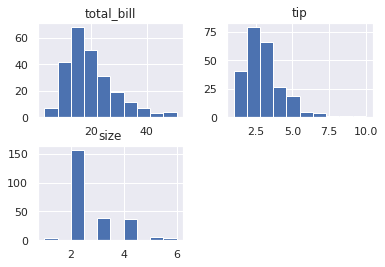

In [317]:
h = tips.hist()

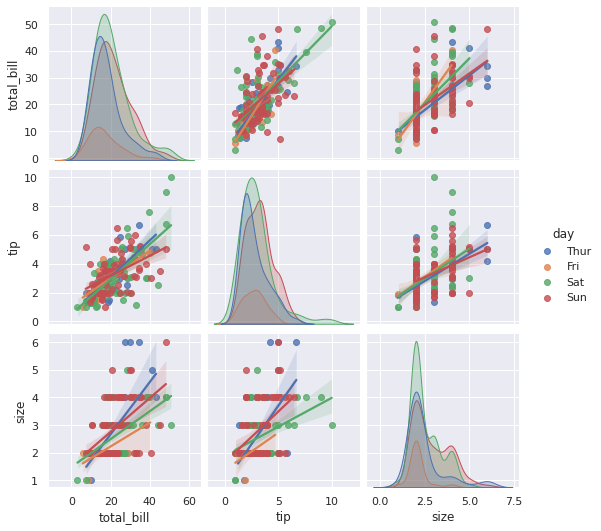

In [318]:
sns.pairplot(data =tips, hue = 'day', kind='reg') # day 기준으로 분류해서 수치값인 나머지 Column들을 그래프에 그린다

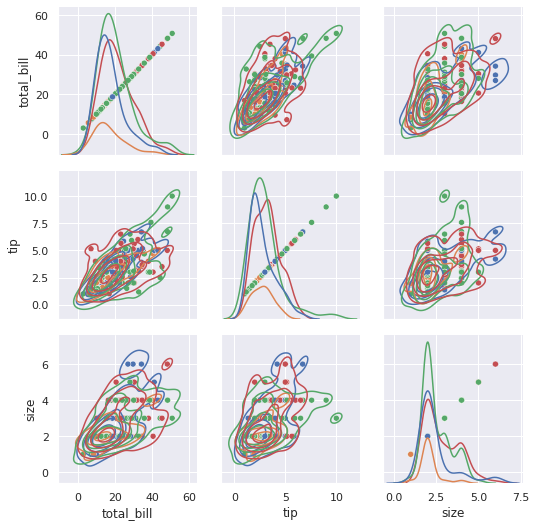

In [319]:
g = sns.PairGrid(tips, diag_sharey=False, hue='day')
g.map(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=5);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

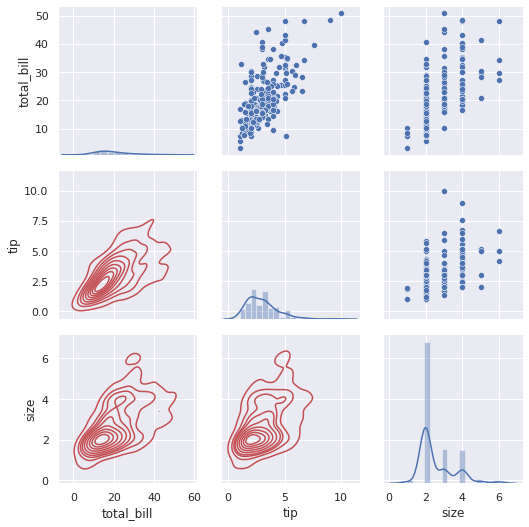

In [362]:
g= sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors='C3')

# nidgeplot

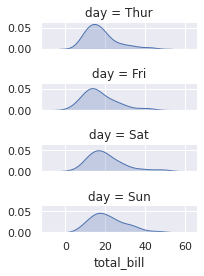

In [321]:
g = sns.FacetGrid(tips, row='day', height=1, aspect=3)
g.map(sns.kdeplot, 'total_bill',shade=True)

# Heatmap

- string 알파벳, 숫자:

      import string
      string.ascii_lowercase # 소문자 abcdefghijklmnopqrstuvwxyz
      string.ascii_uppercase # 대문자 ABCDEFGHIJKLMNOPQRSTUVWXYZ
      string.ascii_letters #대소문자 모두
      abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
      string.digits # 숫자 0123456789

In [322]:
from string import ascii_uppercase
sns.set_theme(style='white')

In [323]:
rs = np.random.RandomState(33)
df=pd.DataFrame(data= rs.normal(size=(100,26)), columns=list(ascii_uppercase))
df.head(2)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707


In [324]:
corr = df.corr()
corr.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,0.019025,0.119540,-0.146043,0.120121,0.001804,-0.041442,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,-0.012235,-0.072379,0.079316,-0.011122,0.057197,0.200635,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,-0.026024,0.092206,-0.000673,0.108226,-0.075359,0.223896,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,0.008442,-0.105018,0.281956,0.020412,0.012707,0.087098,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,-0.028174,0.070383,0.062128,-0.068501,0.032593,-0.216066,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


In [325]:
mask=np.zeros_like(corr, dtype=np.bool) # corr와 같은크기의 배열에 모두 Zero값을 넣고 Bool로 표현,  ones_like - 배열의 크기와 동일하며 모든 원소의 값이 1인 배열을 생성할 수 있습니다
mask[np.triu_indices_from(mask)] = True # 삼각형 위쪽 부분은 모두 True로 표현,  np.triu - 위쪽삼각형,  np.tril - 아래쪽 삼각형
mask[:,2]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

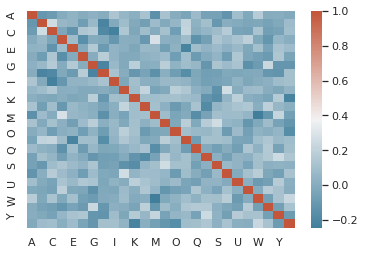

In [326]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

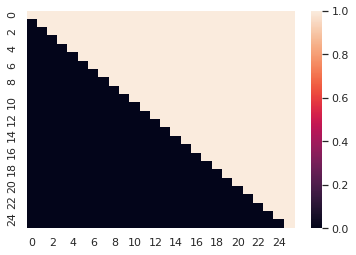

In [327]:
sns.heatmap(mask)

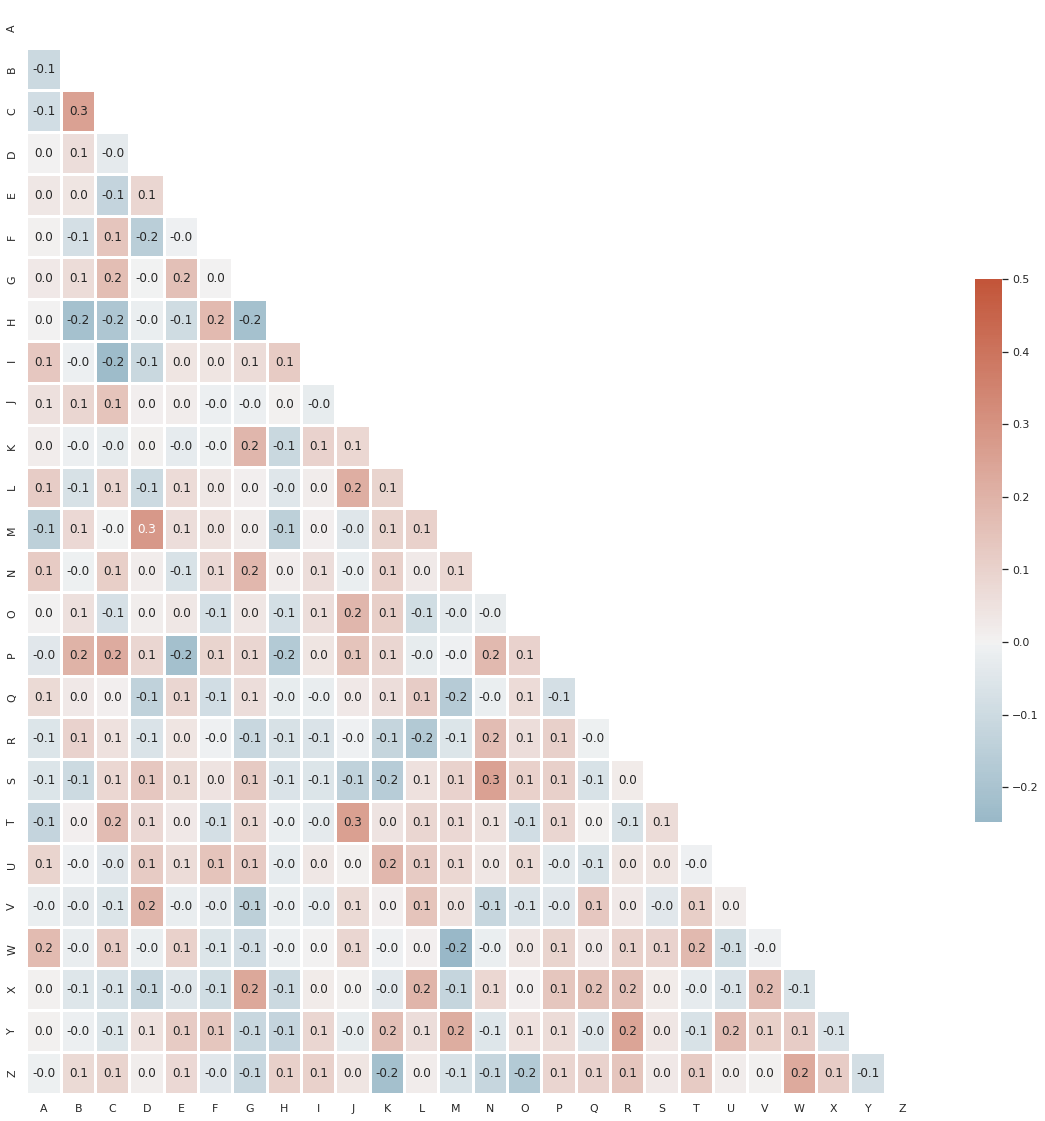

In [328]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, mask = mask,
            cmap=cmap, center=0, vmax=.5,  # center=0을 통하여 0이상은 Red, 0이하는 Blue계열로 표시됨,  vmax= 색상의 최고레벨값설정
            cbar_kws={"shrink":.5}, # cbar_kws - 우측의 color bar 크기 변경
            linewidth=2,           # linewidth - 각 사각형별로 외곽에 라인을그려 간격처럼보이게한다
            annot=True, fmt='.1f') # annot - 값표시, fmt='.1f 소수점한자리까지만표시

# Kdeplot

In [329]:
sns.set_theme(style='darkgrid')

In [330]:
# 데이터 분리
df_setosa = iris.query("species == 'setosa'")
df_virginica = iris.query("species =='virginica'")

df_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


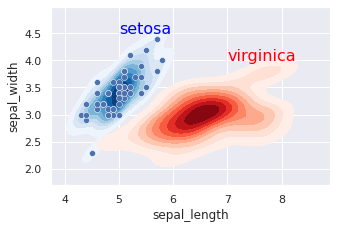

In [331]:
f, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')  # 그래프의 가로, 세로간격을 동일하게 만들어준다
ax.text(5, 4.5, 'setosa', size = 16, color='blue')
ax.text(7, 4, 'virginica', size = 16, color='red')

sns.kdeplot(df_setosa['sepal_length'], df_setosa['sepal_width'],
            shade = True,
            cmap = 'Blues')
sns.kdeplot(data=df_virginica, x='sepal_length', y='sepal_width',
            shade=True,
            cmap='Reds')

sns.scatterplot(data=df_setosa, x='sepal_length', y='sepal_width')

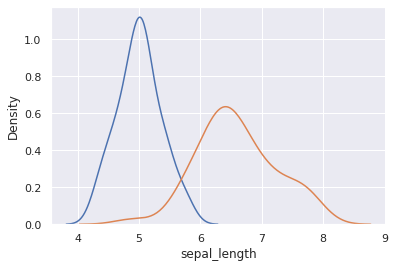

In [332]:
sns.kdeplot(df_setosa['sepal_length'])
sns.kdeplot(df_virginica['sepal_length'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


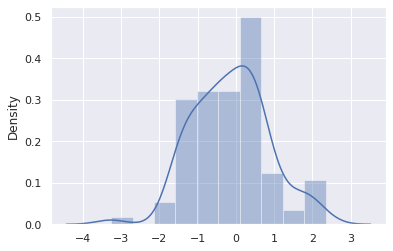

In [333]:

x = np.random.normal(size=100)

sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


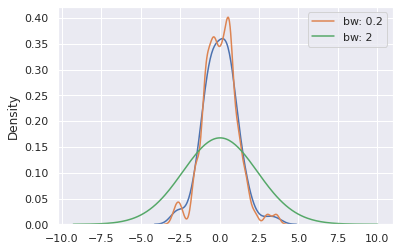

In [334]:
x = np.random.normal(size=100)

sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw: 0.2') # label 범주에 표시할 문자
sns.kdeplot(x, bw=2, label='bw: 2')

plt.legend(); # 범주표시

In [335]:
mean, cov = [0,1],[(1,.5), (.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x','y'])
df.head()

,x,y
0,-1.193639,0.564497
1,-1.522464,0.807659
2,-0.057060,-0.008428
3,0.321825,1.013737
4,0.807998,2.175809


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


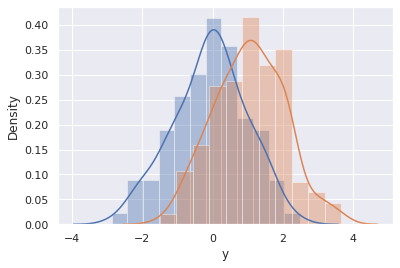

In [336]:
sns.distplot(df['x'])
sns.distplot(df['y'])

# joinplot

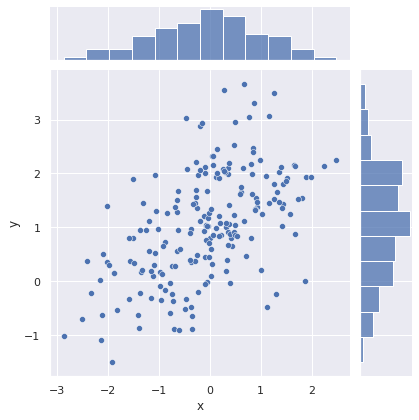

In [337]:
sns.jointplot(data=df, x='x', y='y') # scatterplot을 그리고 상부엔 X축에 대한 빈도 우측엔 Y축에대한 빈도 그래프를 그린다

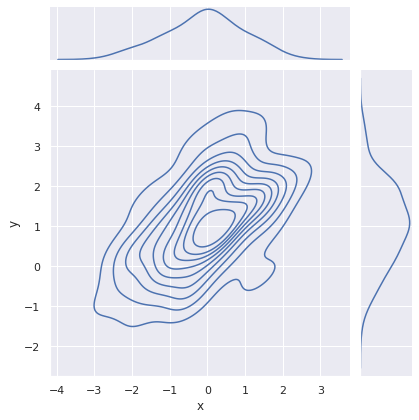

In [338]:
sns.jointplot(data=df, x='x',y='y', kind='kde')

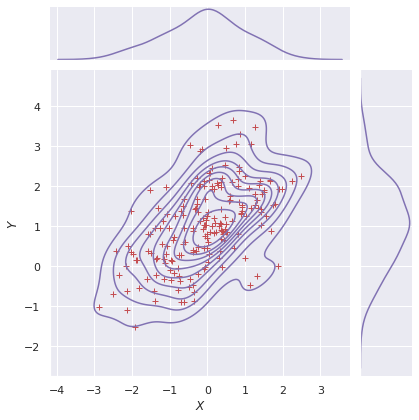

In [339]:
g = sns.jointplot(data=df, x='x', y='y',kind='kde', color='m')
g.plot_joint(plt.scatter, c = 'r', s=30, linewidth=1, marker='+') # 원소의 위치표시
g.set_axis_labels('$X$', '$Y$');

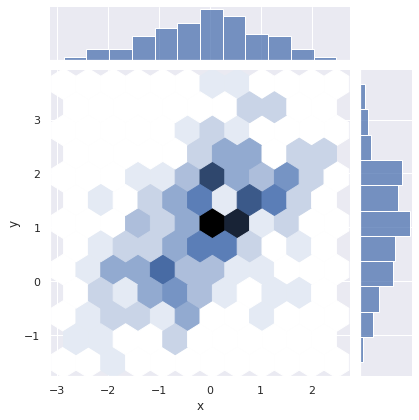

In [340]:
sns.jointplot(data=df, x='x',y='y', kind='hex')

# rugplot

-밀도 표시

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


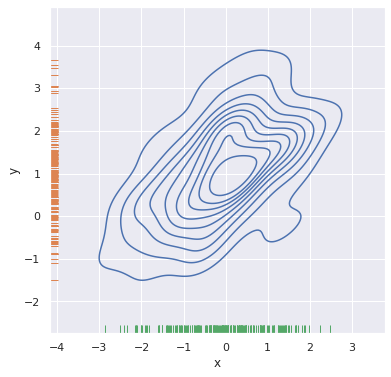

In [341]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=df, x='x', y='y')
sns.rugplot(df['x'], color='g') # X축 밀도표시
sns.rugplot(df['y'], axis='y') # Y축 밀도표시

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


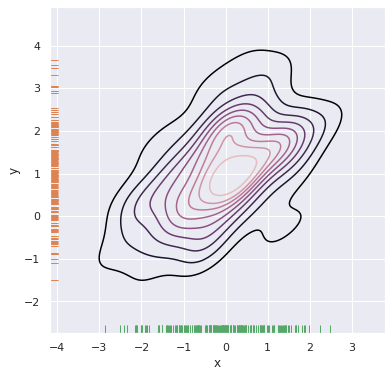

In [342]:
f, ax = plt.subplots(figsize=(6,6))

ChangeCmp = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

sns.kdeplot(data=df, x='x', y='y', cmap = ChangeCmp, )
sns.rugplot(df['x'], color='g') # X축 밀도표시
sns.rugplot(df['y'], axis='y') # Y축 밀도표시

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


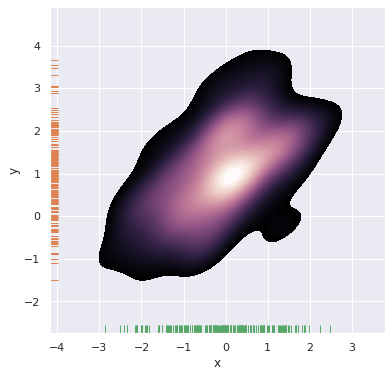

In [343]:
f, ax = plt.subplots(figsize=(6,6))

ChangeCmp = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

sns.kdeplot(df.x, df.y, cmap = ChangeCmp, n_levels=60, shade=True) # n_levels- 등고선이 보이도록 투명도조절
sns.rugplot(df['x'], color='g') # X축 밀도표시
sns.rugplot(df['y'], axis='y') # Y축 밀도표시

# Scatterplot

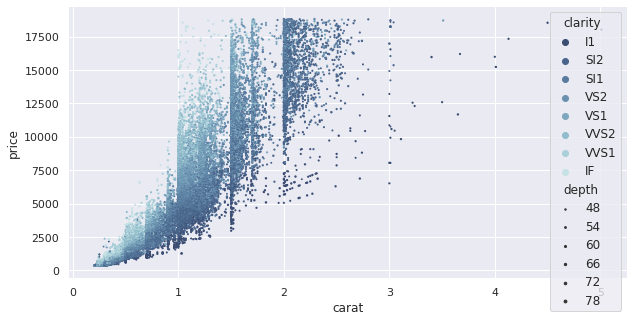

In [344]:
f,ax = plt.subplots(figsize=(10,5))
sns.despine(f, left=True, bottom=True) # Gird의 좌측과 하단의 여백인 좁은 경계를 없애준다
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity',               
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                size='depth', # depth에 따라 point의 크기가 달라진다
                sizes=(1,8),  # point의 크기는 1~8범위내의 크기로 변경된다
                linewidth=0)

# 시계열 데이터

In [345]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


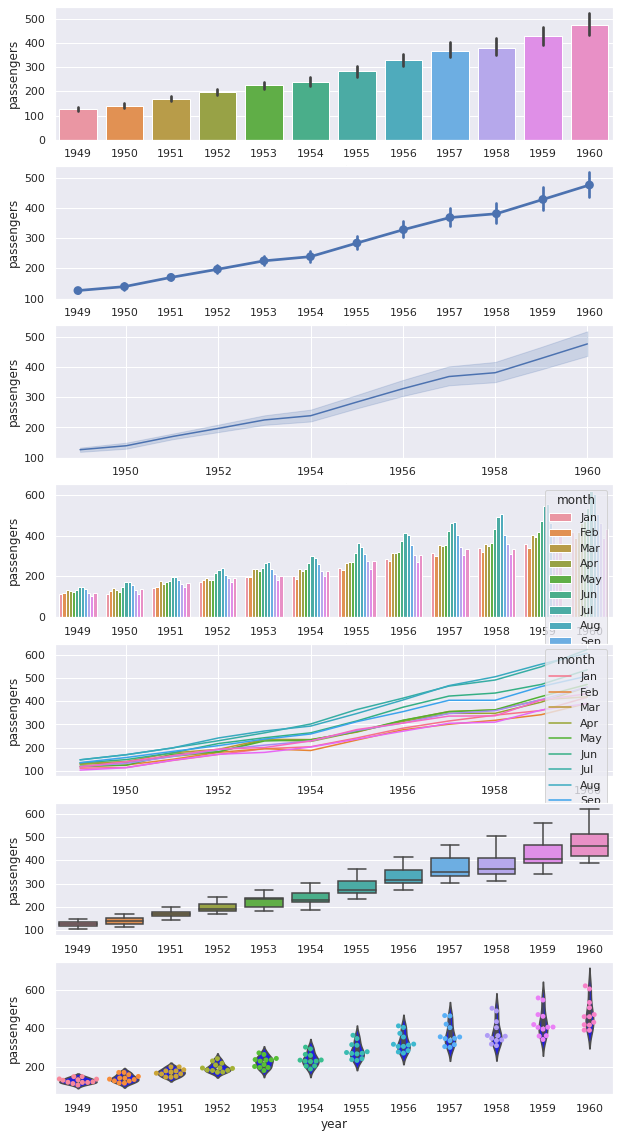

In [346]:
f, ax = plt.subplots(7,1,figsize=(10,20))

sns.barplot(data=flights, x='year', y = 'passengers', ax=ax[0]) #각 그래프의 검정색 수직방향 선은 신뢰구간을 나타낸다
sns.pointplot(data=flights, x= 'year', y='passengers', ax=ax[1])
sns.lineplot(data=flights, x='year', y='passengers', ax=ax[2])
sns.barplot(data=flights, x='year', y='passengers', hue='month', ax=ax[3])
sns.lineplot(data=flights, x='year', y='passengers', hue='month', ax=ax[4])
sns.boxplot(data=flights, x='year', y='passengers', ax=ax[5])
sns.violinplot(data=flights, x='year', y='passengers', color = 'blue', ax=ax[6])
sns.swarmplot(data=flights, x='year', y='passengers', ax=ax[6])


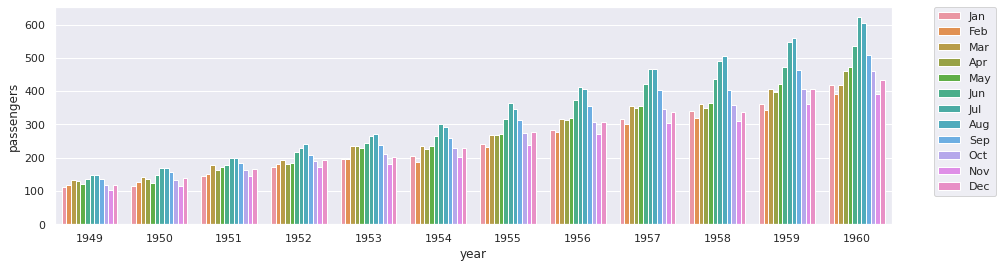

In [347]:
plt.figure(figsize=(15,4))
sns.barplot(data=flights, x='year', y='passengers', hue='month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례박스를 그래프 밖으로 이동시킴

In [348]:
df_h=flights.pivot(index='month', columns='year', values='passengers')
df_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


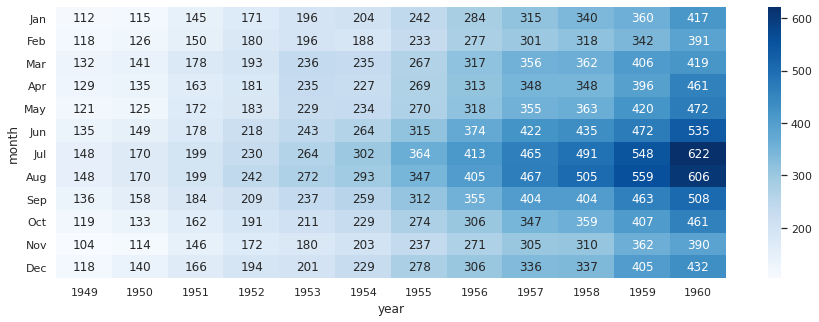

In [349]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df_h, annot=True, fmt='.0f',  cmap='Blues')

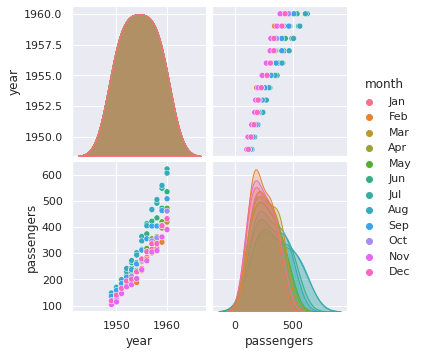

In [350]:
sns.pairplot(data=flights, hue='month')

# datetime형태로 변환

In [351]:
from datetime import datetime

In [352]:
year=2021
month='June'

s=f'{year} {month} 17' # 2021년 6월 17일
d=datetime.strptime(s, '%Y %B %d')
d.strftime('%Y-%m-%d')

'2021-06-17'

In [353]:
def find_datetime(date):
  year = date['year']
  month = date['month']

  s=f'{year} {month} 1'
  d=datetime.strptime(s, '%Y %b %d')
  return d.strftime('%Y-%m-%d')


date = {'year': 1949, 'month': 'Jan'}
find_datetime(date)

'1949-01-01'

In [354]:
flights['date'] = flights.apply(find_datetime, axis=1)
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [355]:
flights['date'] = pd.to_datetime(flights['date']) # to_datetime - datetime 자료형변경 기존 object타입에서 datetime64로 변경됨
flights['date'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: date, dtype: datetime64[ns]

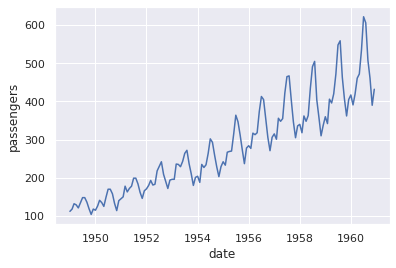

In [356]:
sns.lineplot(data=flights, x='date', y = 'passengers')

# Statsmodels
- Trend, Seasonal, Tesidual을 한번에 볼수 있다
- pip사용시: pip install statsmodels
- 아나콘다: conda install -c conda-forge statsmodels
- 사이트: https://www.statsmodels.org/stable/install.html#

In [357]:
df_date = flights[['date', 'passengers']].set_index('date') # 항목중 date와 passengers만 표시한다
df_date

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# 시계열분해 Additive Model

y = Lever + Trend + Seasonality + Noise

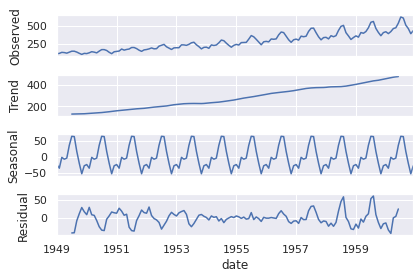

In [358]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date, model='additive')
d = decomp.plot() # Residual - 앞과 뒤값의 차이표시

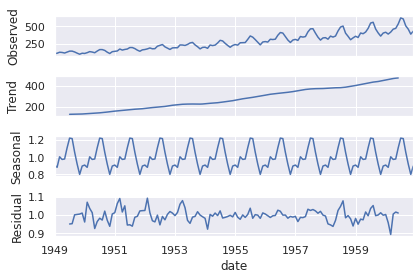

In [359]:
decomp = seasonal_decompose(df_date, model='multiplicative')
d = decomp.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


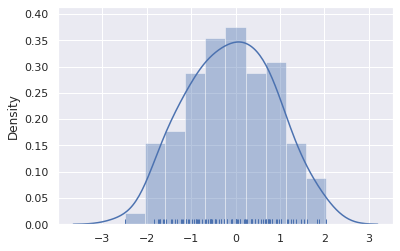

In [360]:
rs = np.random.RandomState(100)
x = rs.normal(size=100)
sns.distplot(x, 
             kde=True, # 정규분포그래프 표시여부 설정
             rug=True,   # 그래프 아래에 밀집도 표시
             bins = 10, # 몇개의 막대그래프로 그릴것인지 설정
             hist=True, # 막대그래프 표시여부 설정
             )  